<a href="https://colab.research.google.com/github/Rima20018/Rima20018/blob/google_colab/Assignment_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
#Load the data
df = pd.read_csv('car_price_prediction.csv')

In [3]:
#Explore the data
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe())


Shape of dataset: (19237, 18)

First 5 rows:
          ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km          6   
1               No    Petrol             3  192000 km          6   
2               No    Petrol           1.3  200000 km          4   
3              Yes    Hybrid           2.5  168966 km          4   
4              Yes    Petrol           1.3   91901 km          4   

  Gear box type Drive wheels  Doors             Wheel   Color  Airbags  
0     Automatic          4x4  4-M

In [21]:
#Clean the data (drop duplicates, handle missing values)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,4-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6,Tiptronic,4x4,4-May,Left wheel,Black,8
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,4-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,4-May,Left wheel,Silver,4
5,45802912,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931,4,Automatic,Front,4-May,Left wheel,White,4


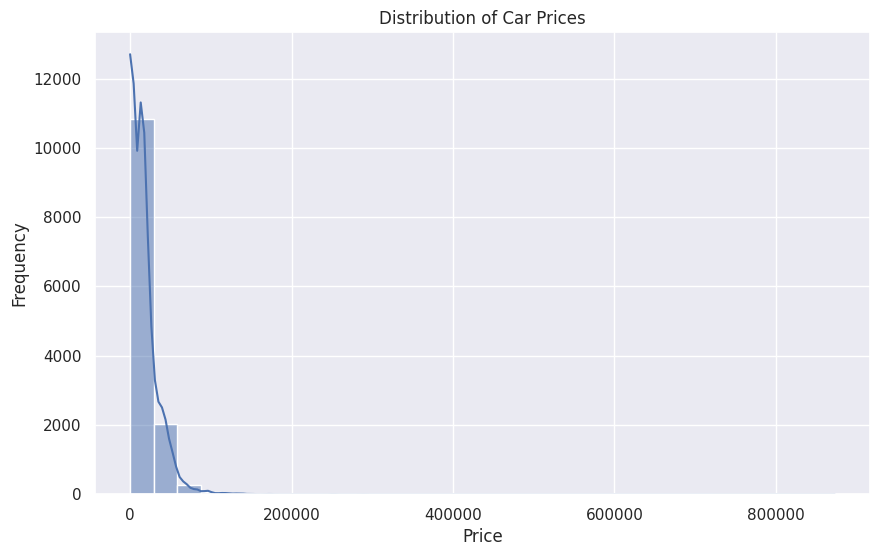

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

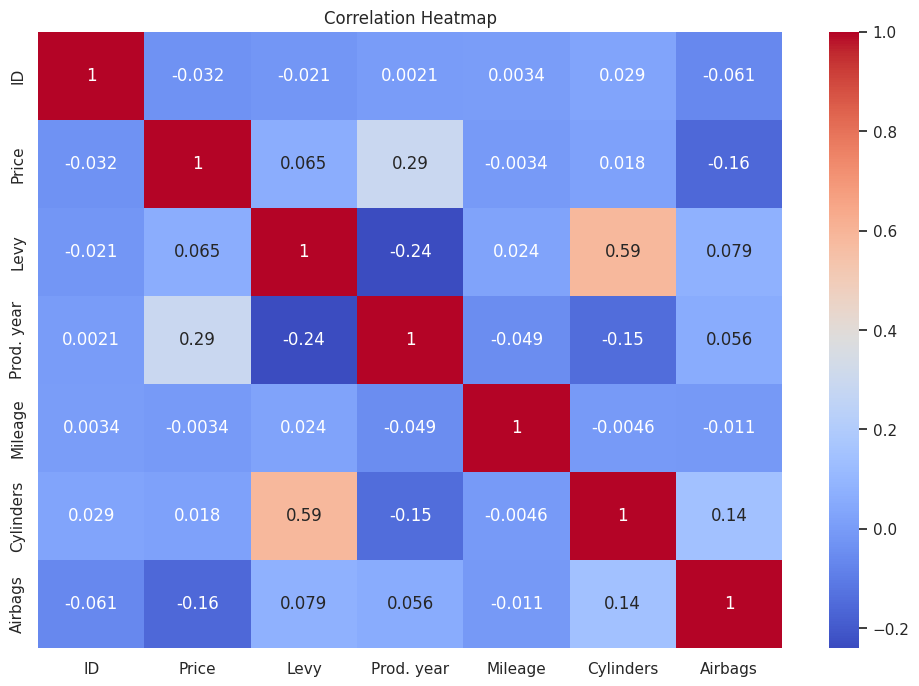

In [23]:
#Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

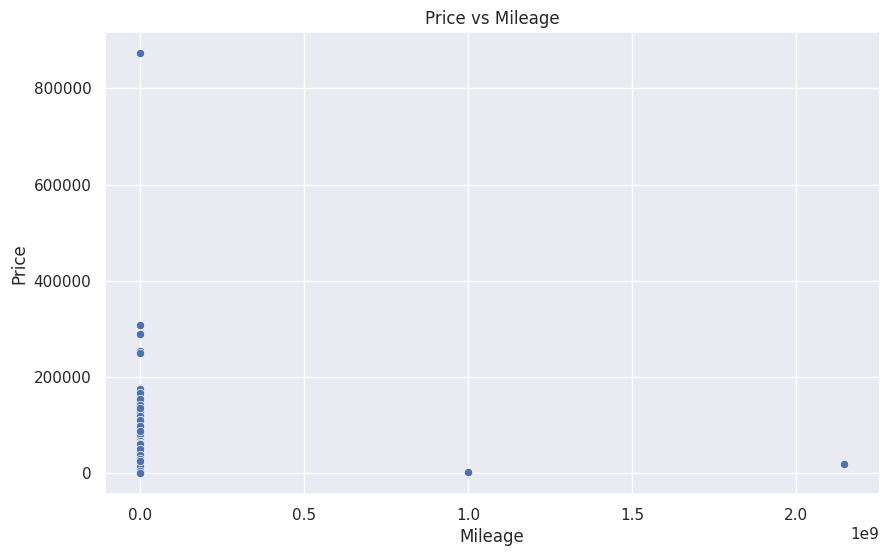

In [24]:
#Scatter plot: Price vs Mileage
if 'Mileage' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Mileage', y='Price', data=df)
    plt.title('Price vs Mileage')
    plt.xlabel('Mileage')
    plt.ylabel('Price')
    plt.show()

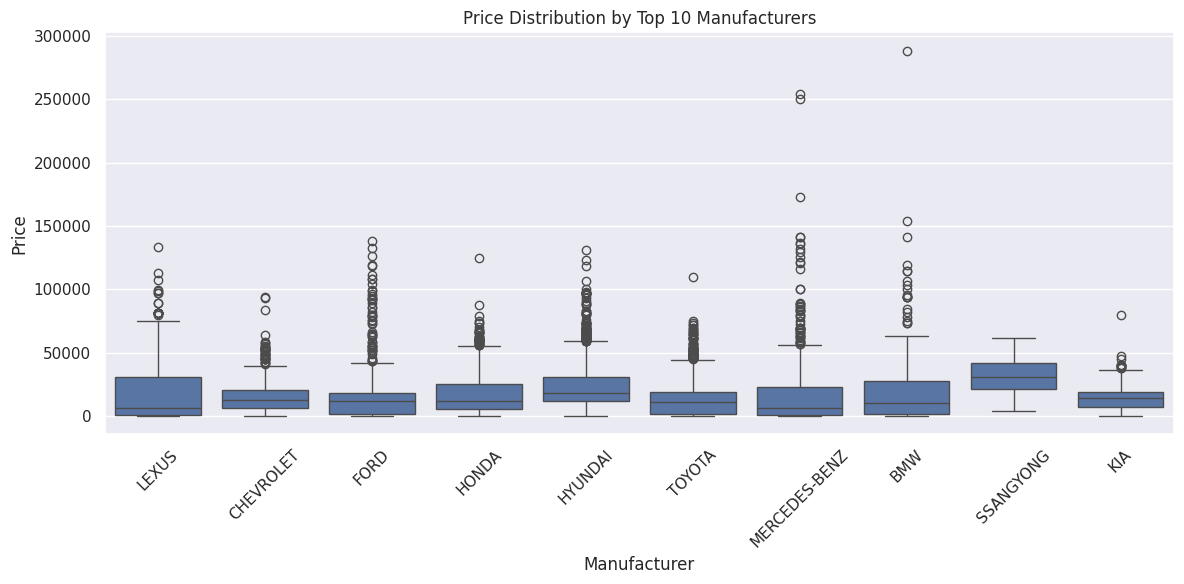

In [25]:
#Price by Manufacturer
plt.figure(figsize=(12, 6))
top_mf = df['Manufacturer'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['Manufacturer'].isin(top_mf)], x='Manufacturer', y='Price')
plt.title('Price Distribution by Top 10 Manufacturers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

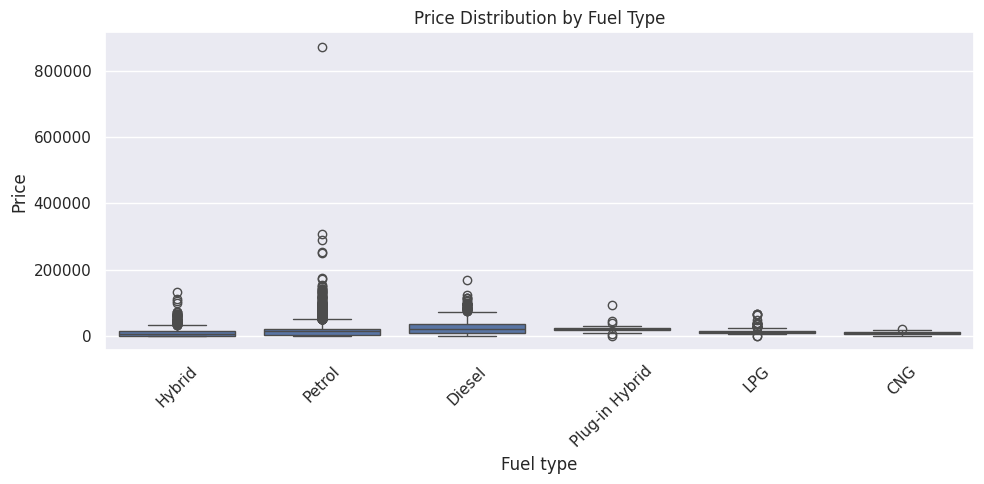

In [26]:
#Price by Fuel Type
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Fuel type', y='Price')
plt.title('Price Distribution by Fuel Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

X = df_encoded.drop(['Price', 'ID'], axis=1, errors='ignore')
y = df_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 517588622.81852776
R²: 0.15957504417928214
